## Import Libraries and Process the Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_training = pd.read_csv('MSFT_train.csv')
dataset_training.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-12-31,37.400002,37.580002,37.220001,37.410000,33.032299,17503500
1,2014-01-02,37.349998,37.400002,37.099998,37.160000,32.811550,30632200
2,2014-01-03,37.200001,37.220001,36.599998,36.910000,32.590809,31134800
3,2014-01-06,36.849998,36.889999,36.110001,36.130001,31.902086,43603700
4,2014-01-07,36.330002,36.490002,36.209999,36.410000,32.149307,35802800


In [3]:
training_data = dataset_training.iloc[:, 1:2].values
training_data

array([[ 37.400002],
       [ 37.349998],
       [ 37.200001],
       ...,
       [ 95.139999],
       [ 99.300003],
       [102.089996]])

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_data_scaled = sc.fit_transform(training_data)

training_data_scaled 

array([[0.03308963],
       [0.03246992],
       [0.03061099],
       ...,
       [0.74866775],
       [0.80022313],
       [0.83479982]])

## Create Data Time Stamps & Rehape the Data

In [5]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_data_scaled[i-60:i, 0])
    y_train.append(training_data_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [6]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train



array([[[0.03308963],
        [0.03246992],
        [0.03061099],
        ...,
        [0.07349114],
        [0.07126038],
        [0.0620895 ]],

       [[0.03246992],
        [0.03061099],
        [0.02627337],
        ...,
        [0.07126038],
        [0.0620895 ],
        [0.06270915]],

       [[0.03061099],
        [0.02627337],
        [0.019829  ],
        ...,
        [0.0620895 ],
        [0.06270915],
        [0.07064073]],

       ...,

       [[0.98475652],
        [0.99169664],
        [0.99851289],
        ...,
        [0.84669729],
        [0.829099  ],
        [0.78014626]],

       [[0.99169664],
        [0.99851289],
        [1.        ],
        ...,
        [0.829099  ],
        [0.78014626],
        [0.74866775]],

       [[0.99851289],
        [1.        ],
        [0.98996162],
        ...,
        [0.78014626],
        [0.74866775],
        [0.80022313]]])

## Create & Compile an RNN Architecure 

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


Using TensorFlow backend.


In [8]:
model = Sequential()

In [9]:
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))


# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))


# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))


# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))


# Adding the output layer
model.add(Dense(units = 1))

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)



Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0379
Epoch 2/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0010
Epoch 3/100
1198/1198 [==============================] - 5s 4ms/step - loss: 8.7661e-04
Epoch 4/100
1198/1198 [==============================] - 4s 3ms/step - loss: 9.3348e-04
Epoch 5/100
1198/1198 [==============================] - 3s 3ms/step - loss: 8.8966e-04
Epoch 6/100
1198/1198 [==============================] - 4s 3ms/step - loss: 8.4784e-04A - ETA: 0s - loss: 8
Epoch 7/100
1198/1198 [==============================] - 4s 3ms/step - loss: 8.8198e-04
Epoch 8/100
1198/1198 [==============================] - 4s 3ms/step - loss: 8.9319e-04
Epoch 9/100
1198/1198 [==============================] - 4s 4ms/step - loss: 9.7599e-04
Epoch 10/100
1198/1198 [==============================] - 4s 3ms/step - loss: 8.4004e-04
Epoch 11/100
1198/1198 [==============================] - 

## Prepare the Test Data , Concatenate Test &  Train Datasets

In [11]:
dataset_testing = pd.read_csv('MSFT_test.csv')
actual_stock_price = dataset_testing.iloc[:, 1:2].values
actual_stock_price

array([[101.290001],
       [ 99.550003],
       [100.099998],
       [ 99.720001],
       [101.639999],
       [103.040001],
       [103.860001],
       [103.220001],
       [103.190002],
       [101.900002],
       [102.510002],
       [105.260002],
       [105.      ],
       [107.459999],
       [106.75    ],
       [106.120003],
       [106.860001],
       [107.239998],
       [106.260002],
       [104.879997],
       [104.620003]])

In [12]:
total_data = pd.concat((dataset_training['Open'], dataset_testing['Open']), axis = 0)
inputs = total_data[len(total_data) - len(dataset_testing) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

## Visualize the Results

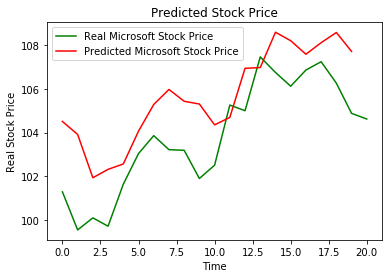

In [13]:
# Visualising the results
plt.plot(actual_stock_price, color = 'green', label = 'Real Microsoft Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Microsoft Stock Price')
plt.title('Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Real Stock Price')
plt.legend()
plt.show()